In [2]:
import cv2
from paddleocr import PaddleOCR

In [3]:
ocr = PaddleOCR()

download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar to C:\Users\dlwns/.paddleocr/whl\det\ch\ch_PP-OCRv4_det_infer\ch_PP-OCRv4_det_infer.tar


100%|██████████| 4.89M/4.89M [00:32<00:00, 152kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar to C:\Users\dlwns/.paddleocr/whl\rec\ch\ch_PP-OCRv4_rec_infer\ch_PP-OCRv4_rec_infer.tar


100%|██████████| 11.0M/11.0M [00:20<00:00, 537kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to C:\Users\dlwns/.paddleocr/whl\cls\ch_ppocr_mobile_v2.0_cls_infer\ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:15<00:00, 142kiB/s] 

[2024/05/11 10:04:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\dlwns/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\dlwns/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [17]:
image = cv2.imread('korean.jpg')

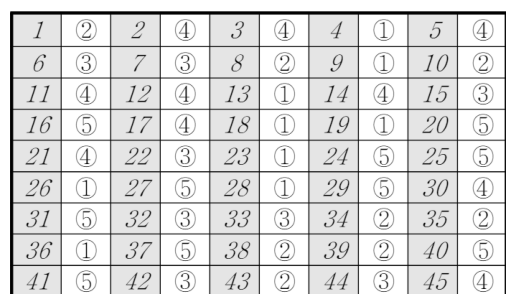

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(image)  # OpenCV의 BGR을 RGB로 변환
plt.axis("off")  # 축 숨기기
plt.show()

In [31]:
result = ocr.ocr(image)

[2024/05/11 10:24:46] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/05/11 10:24:46] ppocr DEBUG: dt_boxes num : 90, elapsed : 0.15053844451904297
[2024/05/11 10:24:48] ppocr DEBUG: rec_res num  : 90, elapsed : 1.8252334594726562


In [32]:
result = sum(result, [])
result[0]

[[[32.0, 14.0], [52.0, 17.0], [47.0, 48.0], [28.0, 45.0]],
 ('1', 0.9975516200065613)]

In [36]:
result[0][1]

('1', 0.9975516200065613)

In [37]:
answer = [data[1] for data in result]
answer

[('1', 0.9975516200065613),
 ('②', 0.7483859062194824),
 ('2', 0.9991994500160217),
 ('④', 0.8141444325447083),
 ('3', 0.9988308548927307),
 ('④', 0.8541378378868103),
 ('4', 0.9979130625724792),
 ('①', 0.7471206784248352),
 ('5', 0.9989973902702332),
 ('④', 0.8474330306053162),
 ('6', 0.9995797276496887),
 ('③', 0.8169543147087097),
 ('7', 0.999500036239624),
 ('③', 0.7757705450057983),
 ('8', 0.9992091059684753),
 ('②', 0.6744567155838013),
 ('9', 0.9980272650718689),
 ('①', 0.7287705540657043),
 ('10', 0.9984269142150879),
 ('②', 0.6803346872329712),
 ('11', 0.987152099609375),
 ('④', 0.7969527244567871),
 ('12', 0.9995970726013184),
 ('④', 0.8805251121520996),
 ('13', 0.9995566606521606),
 ('①', 0.6289454698562622),
 ('14', 0.9994063973426819),
 ('④', 0.7921280860900879),
 ('15', 0.9994885921478271),
 ('③', 0.7505625486373901),
 ('16', 0.9995198249816895),
 ('5', 0.8763155937194824),
 ('17', 0.9995623826980591),
 ('④', 0.7934447526931763),
 ('18', 0.9991092681884766),
 ('①', 0.6601

In [39]:
A = []
P = []

def mapping_answer(answer):
    for i in range(len(answer)):
        if i % 2 == 0:
            P.append(answer[i][0])
        else:
            A.append(answer[i][0])
            
    mapped_dict = dict(zip(P, A))
    return mapped_dict
            
map_dict = mapping_answer(answer)
print(map_dict)

{'1': '②', '2': '④', '3': '④', '4': '①', '5': '④', '6': '③', '7': '③', '8': '②', '9': '①', '10': '②', '11': '④', '12': '④', '13': '①', '14': '④', '15': '③', '16': '5', '17': '④', '18': '①', '19': '①', '20': '5', '21': '④', '22': '③', '23': '①', '24': '5', '25': '5', '26': '①', '27': '5', '28': '①', '29': '5', '30': '④', '31': '5', '32': '③', '33': '③', '34': '②', '35': '②', '36': '①', '37': '5', '38': '②', '39': '②', '40': '5', '41': '5', '42': '③', '43': '②', '44': '③', '45': '④'}


In [58]:
num_dict = {'①':'1', '②':'2', '③':'3', '④':'4', '⑤':'5'}
new_dict = {}

for key, value in map_dict.items():
    try:
        value = num_dict[value]
    except:
        value = value
    new_dict[int(key)] = int(value)
    
print(new_dict)

{1: 2, 2: 4, 3: 4, 4: 1, 5: 4, 6: 3, 7: 3, 8: 2, 9: 1, 10: 2, 11: 4, 12: 4, 13: 1, 14: 4, 15: 3, 16: 5, 17: 4, 18: 1, 19: 1, 20: 5, 21: 4, 22: 3, 23: 1, 24: 5, 25: 5, 26: 1, 27: 5, 28: 1, 29: 5, 30: 4, 31: 5, 32: 3, 33: 3, 34: 2, 35: 2, 36: 1, 37: 5, 38: 2, 39: 2, 40: 5, 41: 5, 42: 3, 43: 2, 44: 3, 45: 4}


In [50]:
import pandas as pd

# 문제 번호와 정답 데이터 준비
data = {
    "문제 번호": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
    "정답": [2, 4, 4, 1, 4, 3, 3, 2, 1, 2, 4, 4, 1, 4, 3, 5, 4, 1, 1, 5, 4, 3, 1, 5, 5, 1, 5, 1, 5, 4, 5, 3, 3, 2, 2, 1, 5, 2, 2, 5, 5, 3, 2, 3, 4]
}

# DataFrame 생성
df = pd.Series(data)

# Series 변환
series = df["정답"]

In [61]:
sum = 0

for real, pre in zip(series, new_dict.values()):
    if real == pre:
        sum += 1
        
print(sum)

45


### 정확도가 매우 높고 충분히 paddleocr정도로 충분함

In [1]:
print('{}'.format(int(input())))

1
